# Table of Content

- [Data Import](#Data-Import)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)

## Data Import

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/large_train_sample.csv')

In [3]:
# encoding the target column
df['target'] = df.wage.map(lambda x: 1 if x==' >50K' else 0)
df.drop('wage',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  target          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [10]:
def add_binary(df,header,column,threshold):
        scores = df.groupby(df[column]).mean()
        good_status = scores[scores['target'] > threshold].index 
        df[header] = df[column].map(lambda x: 1 if x in good_status else 0)
        return print(f'Added {header} column')

In [14]:
df.groupby('occupation').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,good_country,educated
occupation,,,,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131,0.103635,0.052089,0.196419
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355,0.134483,0.047480,0.251459
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667,0.111111,0.000000,0.222222
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221,0.226641,0.042937,0.152232
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703,0.484014,0.060502,0.558780
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940,0.115694,0.022133,0.158954
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445,0.062774,0.034307,0.078102
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744,0.124875,0.048951,0.087413
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669,0.041578,0.064643,0.120789


In [11]:
add_binary(df,'educated','education',0.24)
add_binary(df,'good_country','native-country',0.25)
add_binary(df,'is_married','marital-status',0.4)
add_binary(df,'is_spouse','relationship',0.4)
add_binary(df,'high_class','workclass',0.25)
add_binary(df,'','',)

Added educated column


In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,target,good_country,educated
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,1,1


In [6]:
df_dum = pd.get_dummies(df,columns=df.select_dtypes('object').columns,drop_first=True)

## Exploratory Data Analysis

In [8]:
corr = df.corr()

<AxesSubplot:>

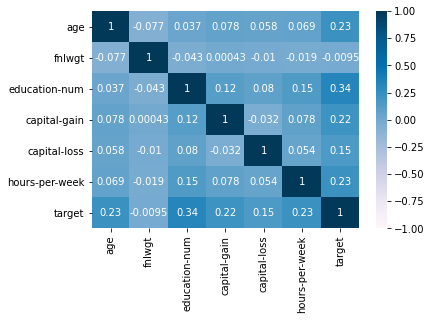

In [9]:
sns.heatmap(corr,cmap='PuBu',vmin=-1,vmax=1,annot=True)

In [10]:
# Baseline score
df[['target']].value_counts(normalize=True)

target
0         0.75919
1         0.24081
dtype: float64

## Modeling

(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [11]:
X = df_dum.drop(columns=['target','fnlwgt'],axis=1)
y = df_dum['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [12]:
model_params = {}
count = 0

In [13]:
t0 = time.time()

pipe = Pipeline([
    ('rf', RandomForestClassifier())
    
])

pipe_params = {
    'rf__n_estimators':[50],
    'rf__criterion':['gini'],
    'rf__max_depth':[None],
    'rf__min_samples_split':[2],
    'rf__min_samples_leaf':[1],
    'rf__min_weight_fraction_leaf':[0.0],
    'rf__max_features':['auto'],
    'rf__max_leaf_nodes':[None],
    'rf__min_impurity_decrease':[0.0],
    'rf__min_impurity_split':[None],
    'rf__bootstrap':[True],
    'rf__oob_score':[False],
    'rf__n_jobs':[None],
    'rf__random_state':[None],
    'rf__verbose':[0],
    'rf__warm_start':[False],
    'rf__class_weight':[None],
    'rf__ccp_alpha':[0.001],
    'rf__max_samples':[None]
}

gs = GridSearchCV(pipe, # what object are we optimizing?
                  param_grid=pipe_params, # what parameters values are we searching?
                  cv=5, # 5-fold cross-validation.
                  n_jobs=4,
                  verbose = 2)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['score'] = gs.best_score_
model_params[f'model_{count}'] = gs.best_params_
print(f'Run time: {time.time()-t0}')
model_df = pd.DataFrame.from_dict(model_params,orient='index')
model_df

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   43.2s finished


Run time: 45.796786069869995


,rf__bootstrap,rf__ccp_alpha,rf__class_weight,rf__criterion,rf__max_depth,rf__max_features,rf__max_leaf_nodes,rf__max_samples,rf__min_impurity_decrease,rf__min_impurity_split,rf__min_samples_leaf,rf__min_samples_split,rf__min_weight_fraction_leaf,rf__n_estimators,rf__n_jobs,rf__oob_score,rf__random_state,rf__verbose,rf__warm_start,score
model_1,True,0.001,None,gini,None,auto,None,None,0.0,None,1,2,0.0,50,None,False,None,0,False,0.850614


In [14]:
print(f'Random Forest Classifier Training Accuracy: {gs.score(X_train, y_train)}\n')
print(f'Random Forest Classifier Testing Accuracy: {gs.score(X_test, y_test)}\n')

Random Forest Classifier Training Accuracy: 0.8509418509418509

Random Forest Classifier Testing Accuracy: 0.8528436310035622



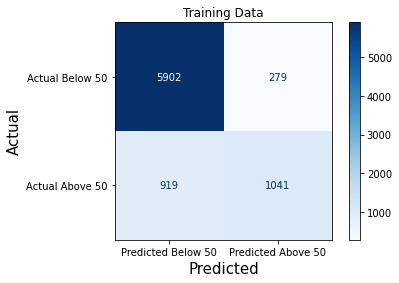

In [15]:
preds = gs.predict(X_test)

# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# Show the confusion matrix for the model

plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Training Data')
plt.xlabel('Predicted',size=15)
plt.ylabel('Actual',size=15)
plt.xticks(ticks=[0,1],labels=['Predicted Below 50', 'Predicted Above 50'])
plt.yticks(ticks=[0,1],labels=['Actual Below 50', 'Actual Above 50'])
#plt.savefig('images/'+name+'.png',format='png')
plt.show();